<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1ZdDjeHP-3kYDMLFobwovf-9K4e9l2NQS" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [ ]:
import nltk

nltk.download('punkt')

!pip install -q spacy
!python -m spacy download es_core_news_sm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 89.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install -q transformers


In [ ]:
# He decidido que primero voy a probar a hacelo con textos generados por IA para poder ver claramente cómo funciona el código

positiva= """
Hoy ha sido un día maravilloso. El sol brillaba intensamente y el aire era fresco y limpio.
Disfruté mucho de un paseo por el parque, donde las flores estaban en plena floración y los pájaros cantaban melodías alegres.
Me sentí lleno de energía y optimismo. Por la tarde, compartí una deliciosa comida con buenos amigos, entre risas y
conversaciones interesantes. Sin duda, un día para recordar con una sonrisa."""



neutra="""
El informe detalla las fluctuaciones del mercado durante el último trimestre. Se observó un incremento moderado en el sector
tecnológico, mientras que el sector de la construcción experimentó una ligera desaceleración. Los datos presentados se basan
en el análisis de diversas fuentes primarias y secundarias. Las conclusiones sugieren una estabilidad general, aunque con
ciertas variaciones sectoriales específicas. Se recomienda un seguimiento continuo de estas tendencias para futuras evaluaciones.
"""

negativa="""
La noticia nos dejó profundamente consternados. El accidente ocurrió en la carretera principal, causando graves daños y
lamentablemente, pérdidas humanas, con unos 30 muertos y 50 heridos. La investigación inicial apunta a un fallo mecánico como posible causa.
La comunidad local se encuentra de luto y ha expresado su solidaridad con las familias afectadas. Es un momento de tristeza y
reflexión ante esta terrible tragedia que ha golpeado a todos.
"""


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# Cargar el modelo BERT y el tokenizador
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Crear una pipeline de análisis de sentimientos
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Analizar el sentimiento del texto
result = nlp(positiva)[0]
print(f"Detectar Positivo: {result['label']}, con una puntuación: {round(result['score'], 4)}")

result = nlp(neutra)[0]
print(f"Detectar Neutro: {result['label']}, con una puntuación: {round(result['score'], 4)}")

result = nlp(negativa)[0]
print(f"Detectar Negativo: {result['label']}, con una puntuación: {round(result['score'], 4)}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Detectar Positivo: 5 stars, con una puntuación: 0.9168
Detectar Neutro: 4 stars, con una puntuación: 0.5195
Detectar Negativo: 1 star, con una puntuación: 0.7245


Ahora voy a hacer los gráficos, para ello he tenido que <u>usar la IA de Gemini</u> ya que me resultaba muy complejo hacerlo sin una guía a seguir. He tenido que hacerlo en varios pasos ya que la IA en un principio no me daba el resultado que quería, pero ha sido de una gran ayuda ya que sin ella no lo hubiera sacado.

Device set to use cpu


Analizando texto: 'Positivo' - '
Hoy ha sido un día maravilloso. El sol brillaba i...'
Probabilidades calculadas para 'Positivo': ['0.0013', '0.0014', '0.0073', '0.0731', '0.9168']
Analizando texto: 'Neutro' - '
El informe detalla las fluctuaciones del mercado ...'
Probabilidades calculadas para 'Neutro': ['0.0077', '0.0498', '0.3495', '0.5195', '0.0735']
Analizando texto: 'Negativo' - '
La noticia nos dejó profundamente consternados. E...'
Probabilidades calculadas para 'Negativo': ['0.7245', '0.1615', '0.0287', '0.0201', '0.0652']

Probabilidades para el texto 'Positivo' (desde el diccionario):
- 1 estrella: 0.0013
- 2 estrellas: 0.0014
- 3 estrellas: 0.0073
- 4 estrellas: 0.0731
- 5 estrellas: 0.9168


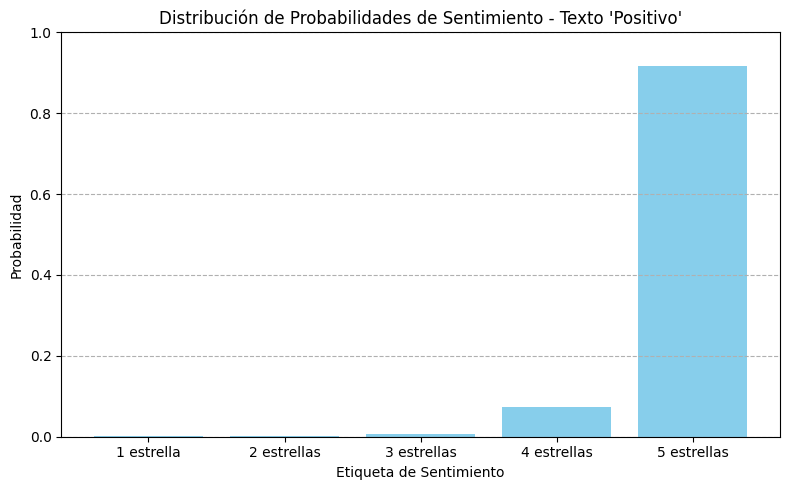


Probabilidades para el texto 'Neutro' (desde el diccionario):
- 1 estrella: 0.0077
- 2 estrellas: 0.0498
- 3 estrellas: 0.3495
- 4 estrellas: 0.5195
- 5 estrellas: 0.0735


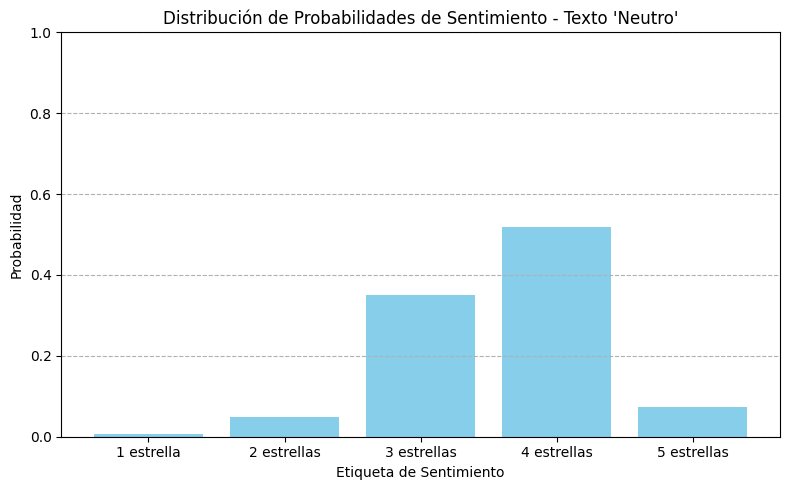


Probabilidades para el texto 'Negativo' (desde el diccionario):
- 1 estrella: 0.7245
- 2 estrellas: 0.1615
- 3 estrellas: 0.0287
- 4 estrellas: 0.0201
- 5 estrellas: 0.0652


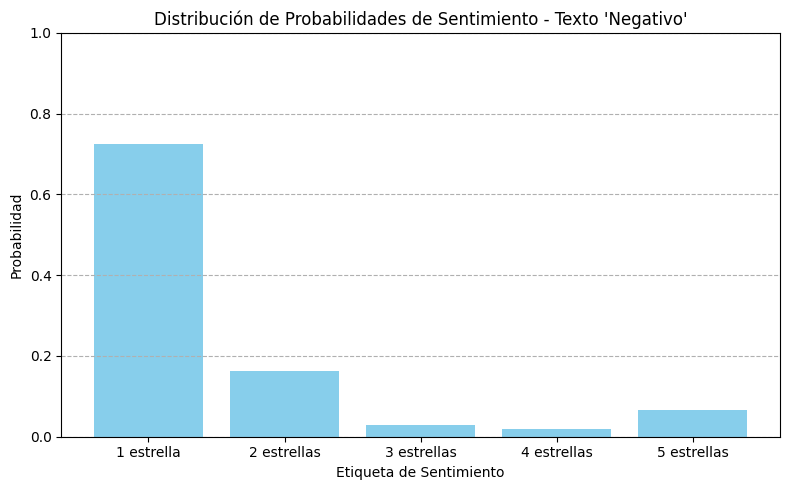

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import torch

# Cargar el modelo BERT y el tokenizador
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Crear una pipeline de análisis de sentimientos
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Textos a analizar
positiva= """
Hoy ha sido un día maravilloso. El sol brillaba intensamente y el aire era fresco y limpio.
Disfruté mucho de un paseo por el parque, donde las flores estaban en plena floración y los pájaros cantaban melodías alegres.
Me sentí lleno de energía y optimismo. Por la tarde, compartí una deliciosa comida con buenos amigos, entre risas y
conversaciones interesantes. Sin duda, un día para recordar con una sonrisa."""

neutra="""
El informe detalla las fluctuaciones del mercado durante el último trimestre. Se observó un incremento moderado en el sector
tecnológico, mientras que el sector de la construcción experimentó una ligera desaceleración. Los datos presentados se basan
en el análisis de diversas fuentes primarias y secundarias. Las conclusiones sugieren una estabilidad general, aunque con
ciertas variaciones sectoriales específicas. Se recomienda un seguimiento continuo de estas tendencias para futuras evaluaciones.
"""

negativa="""
La noticia nos dejó profundamente consternados. El accidente ocurrió en la carretera principal, causando graves daños y
lamentablemente, pérdidas humanas, con unos 30 muertos y 50 heridos. La investigación inicial apunta a un fallo mecánico como posible causa.
La comunidad local se encuentra de luto y ha expresado su solidaridad con las familias afectadas. Es un momento de tristeza y
reflexión ante esta terrible tragedia que ha golpeado a todos.
"""

textos = {
    "Positivo": positiva,
    "Neutro": neutra,
    "Negativo": negativa
}

# Etiquetas de sentimiento que el modelo predice
sentiment_labels_modelo = ["1 estrella", "2 estrellas", "3 estrellas", "4 estrellas", "5 estrellas"]

# Analizar el sentimiento de cada texto y obtener las probabilidades detalladas
resultados_probabilidades = {}
for nombre_texto, texto in textos.items():
    print(f"Analizando texto: '{nombre_texto}' - '{texto[:50]}...'")
    inputs = tokenizer(texto, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = F.softmax(outputs.logits, dim=-1).cpu().numpy()[0]
    print(f"Probabilidades calculadas para '{nombre_texto}': {[f'{p:.4f}' for p in probabilities]}")
    resultados_probabilidades[nombre_texto] = probabilities

#print("\nContenido del diccionario resultados_probabilidades:")
#print(resultados_probabilidades)

# Imprimir las probabilidades para cada texto
for nombre_texto in resultados_probabilidades: # Iteramos solo sobre las claves del diccionario
    probabilities = resultados_probabilidades[nombre_texto] # Accedemos a las probabilidades correctas usando la clave
    print(f"\nProbabilidades para el texto '{nombre_texto}' (desde el diccionario):")
    for i, prob in enumerate(probabilities):
        print(f"- {sentiment_labels_modelo[i]}: {prob:.4f}")

    # Crear un gráfico para mostrar las probabilidades detalladas
    plt.figure(figsize=(8, 5))
    plt.bar(sentiment_labels_modelo, probabilities, color='skyblue')
    plt.ylabel("Probabilidad")
    plt.xlabel("Etiqueta de Sentimiento")
    plt.title(f"Distribución de Probabilidades de Sentimiento - Texto '{nombre_texto}'")
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

Ahora que veo que el modelo funciona voy a probar con las canciones (perdón por repetir código)

In [ ]:
neutra_serrar_mediterraneo = """
Quizá porque mi niñez sigue jugando en tu playa
Y escondido trás las cañas, duerme mi primer amor
Llevo tu luz y tu olor por donde quiera que vaya
Y, amontonado en tu arena, guardo amor, juegos y penas

Yo, que en la piel tengo el sabor amargo del llanto eterno
Que han vertido en ti, cien pueblos, de Algeciras a Estambul
Para que pintes de azul sus largas noches de invierno
A fuerza de desventuras, tu alma es profunda y oscura

A tus atardeceres rojos, se acostumbraron mis ojos
Como el recodo al camino
Soy cantor, soy embustero
Me gusta el juego y el vino, tengo alma de marinero
¿Qué le voy a hacer si yo nací en el Mediterráneo?
Nací en el Mediterráneo

Y te acercas, y te vas después de besar mi aldea
Jugando con la marea, te vas pensando en volver
Eres como una mujer perfumadita de brea
Que se añora y que se quiere, que se conoce y se teme

Ay, si un día, para mi mal, viene a buscarme la parca
Empujad al mar mi barca con un levante otoñal
Y dejad que el temporal desguace sus alas blancas
Y a mí enterradme sin duelo entre la playa y el cielo

En la ladera de un monte, más alto que el horizonte
Quiero tener buena vista
Mi cuerpo será camino
Le daré verde a los pinos y amarillo a la genista

Cerca del mar, porque yo nací en el Mediterráneo
Nací en el Mediterráneo
Nací en el Mediterráneo
"""

positiva_hombresG_pasarmeloBien = """
Hoy me he levantado dando un salto mortal
He echado un par de huevos a mi sartén
Dando volteretas he llegado al baño
Me he duchado y he despilfarrado el gel
Porque hoy, algo me dice
Que voy a pasármelo bien

Sé que tengo algunos enemigos
Pero esta noche no podrán contar conmigo
Porque voy a convertirme en hombre-lobo
Me he jurado a mí mismo que no dormiré solo
Porque hoy, de hoy no pasa
Y voy a pasármelo bien

Voy a cogerme un pedo de los que hacen afición
Me iré arrastrando a casa con la sonrisa puesta
Mañana ya si puedo dormiré la siesta
Pero esta noche no (esta noche no)
Esta noche, algo me dice
Que voy a pasármelo bien

Bueno, vamos a ver que encontramos
En esta agendilla de teléfonos, nunca se sabe
Marta, María del mar, Ana, ¿Elena estará?
No sé
Pero voy a pasármelo bien

Hoy me he levantado dando un salto mortal
Me he quitado el pijama sin usar las manos
Dando volteretas he llegado al baño
Le he dado buenos días a mis padres y hermanos
Porque hoy
Hoy no sé por qué, pero voy a pasármelo bien

Voy a pasármelo bien
Voy a pasármelo, muy bien
Muy bien, muy bien
Y voy a pasármelo bien
Muy bien, muy bien, muy bien

Y voy a pasar, voy a pasármelo bien
Hey, hey, muy bien
Voy a pasármelo bien

Hey, hey
Hey, hey, muy bien
Y voy a pasármelo bien
Hey, hey, muy bien

Muy
Bien
"""

negativa_silvioRodriguez_ojala = """
Ojalá que las hojas no te toquen el cuerpo cuando caigan
Para que no las puedas convertir en cristal
Ojalá que la lluvia deje de ser milagro que baja por tu cuerpo
Ojalá que la Luna pueda salir sin ti

Ojalá que la tierra no te bese los pasos
Ojalá se te acabe la mirada constante
La palabra precisa, la sonrisa perfecta
Ojalá pase algo que te borre de pronto
Una luz cegadora, un disparo de nieve

Ojalá, por lo menos, que me lleve la muerte
Para no verte tanto, para no verte siempre
En todos los segundos, en todas las visiones
Ojalá que no pueda tocarte ni en canciones

Ojalá que la aurora no dé gritos que caigan en mi espalda
Ojalá que tu nombre se le olvide a esa voz
Ojalá las paredes no retengan tu ruido de camino cansado
Ojalá que el deseo se vaya tras de ti
A tu viejo gobierno de difuntos y flores

Ojalá se te acabe la mirada constante
La palabra precisa, la sonrisa perfecta
Ojalá pase algo que te borre de pronto
Una luz cegadora, un disparo de nieve

Ojalá, por lo menos, que me lleve la muerte
Para no verte tanto, para no verte siempre
En todos los segundos, en todas las visiones
Ojalá que no pueda tocarte ni en canciones
Ojalá pase algo que te borre de pronto
Una luz cegadora, un disparo de nieve

Ojalá, por lo menos, que me lleve la muerte
Para no verte tanto, para no verte siempre
En todos los segundos, en todas las visiones
Ojalá que no pueda tocarte ni en canciones
"""

Device set to use cpu


Analizando texto: 'Positivo: Hombres G - Voy a pasármelo bien' - '
Hoy me he levantado dando un salto mortal
He echa...'
Probabilidades calculadas para 'Positivo: Hombres G - Voy a pasármelo bien': ['0.4017', '0.2239', '0.1449', '0.0897', '0.1398']
Analizando texto: 'Neutro: Serrat - Mediterráneo ' - '
Quizá porque mi niñez sigue jugando en tu playa
Y...'
Probabilidades calculadas para 'Neutro: Serrat - Mediterráneo ': ['0.0368', '0.0454', '0.0812', '0.2398', '0.5968']
Analizando texto: 'Negativo: Silvio Rodríguez - Ojalá' - '
Ojalá que las hojas no te toquen el cuerpo cuando...'
Probabilidades calculadas para 'Negativo: Silvio Rodríguez - Ojalá': ['0.4854', '0.2073', '0.0943', '0.0730', '0.1400']

Probabilidades para el texto 'Positivo: Hombres G - Voy a pasármelo bien' (desde el diccionario):
- 1 estrella: 0.4017
- 2 estrellas: 0.2239
- 3 estrellas: 0.1449
- 4 estrellas: 0.0897
- 5 estrellas: 0.1398


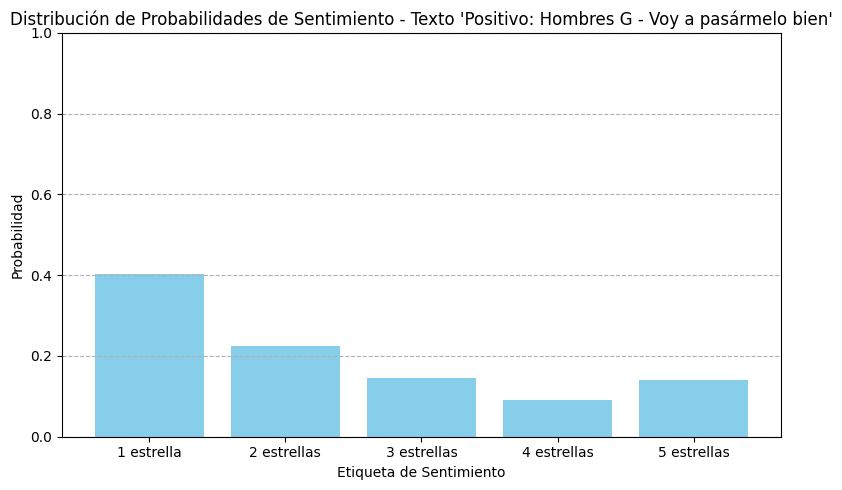


Probabilidades para el texto 'Neutro: Serrat - Mediterráneo ' (desde el diccionario):
- 1 estrella: 0.0368
- 2 estrellas: 0.0454
- 3 estrellas: 0.0812
- 4 estrellas: 0.2398
- 5 estrellas: 0.5968


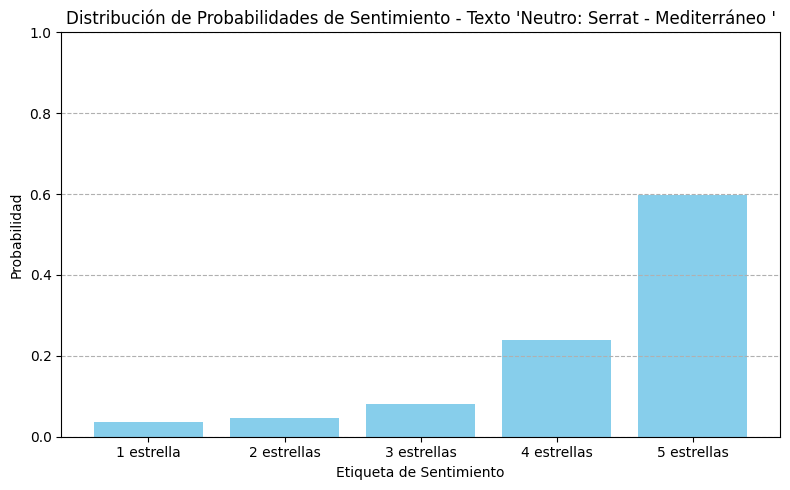


Probabilidades para el texto 'Negativo: Silvio Rodríguez - Ojalá' (desde el diccionario):
- 1 estrella: 0.4854
- 2 estrellas: 0.2073
- 3 estrellas: 0.0943
- 4 estrellas: 0.0730
- 5 estrellas: 0.1400


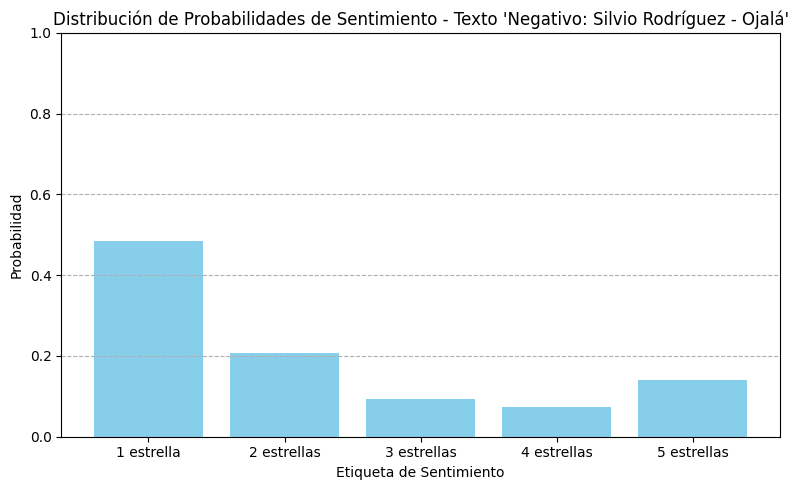

In [ ]:
# Cargar el modelo BERT y el tokenizador
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Crear una pipeline de análisis de sentimientos
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

textos = {
    "Positivo: Hombres G - Voy a pasármelo bien": positiva_hombresG_pasarmeloBien,
    "Neutro: Serrat - Mediterráneo ": neutra_serrar_mediterraneo,
    "Negativo: Silvio Rodríguez - Ojalá": negativa_silvioRodriguez_ojala
}

# Etiquetas de sentimiento que el modelo predice
sentiment_labels_modelo = ["1 estrella", "2 estrellas", "3 estrellas", "4 estrellas", "5 estrellas"]

# Analizar el sentimiento de cada texto y obtener las probabilidades detalladas
resultados_probabilidades = {}
for nombre_texto, texto in textos.items():
    print(f"Analizando texto: '{nombre_texto}' - '{texto[:50]}...'")
    inputs = tokenizer(texto, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = F.softmax(outputs.logits, dim=-1).cpu().numpy()[0]
    print(f"Probabilidades calculadas para '{nombre_texto}': {[f'{p:.4f}' for p in probabilities]}")
    resultados_probabilidades[nombre_texto] = probabilities



# Imprimir las probabilidades para cada texto
for nombre_texto in resultados_probabilidades: # Iteramos solo sobre las claves del diccionario
    probabilities = resultados_probabilidades[nombre_texto] # Accedemos a las probabilidades correctas usando la clave
    print(f"\nProbabilidades para el texto '{nombre_texto}' (desde el diccionario):")
    for i, prob in enumerate(probabilities):
        print(f"- {sentiment_labels_modelo[i]}: {prob:.4f}")

    # Crear un gráfico para mostrar las probabilidades detalladas
    plt.figure(figsize=(8, 5))
    plt.bar(sentiment_labels_modelo, probabilities, color='skyblue')
    plt.ylabel("Probabilidad")
    plt.xlabel("Etiqueta de Sentimiento")
    plt.title(f"Distribución de Probabilidades de Sentimiento - Texto '{nombre_texto}'")
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()




## Conclusiones

Aunque el modelo funciona bien ya que primero lo he probado con textos positivos, con palabras como:
maravilloso, sol, brillaba, aire,fresco, limpio, disfruté, paseo ..
El neutro donde se relara un informe sobre economía y el negativo en dónde se habla sobre la noticia de un accidente con palabras como muerte, accidente, heridos, trágico.

Al llegar a las canciones ya no funciona tan bien: la canción de Hombres G, "voy a pasarmelo bien" aunque es claramente una canción positiva el texto incluye palabras como
salto mortal, despilfarrado, enemigos , convertirme en hombre-lobo, ...  que el modelo identifica como negativas y no entiende el contexto de la letra.
Por otro lado la canción de Serrat yo la esperaba como algo neutro porque el autor relata de una forma muy bonita como es el lugar donde nació pero al hacerlo de esa manera el modelo lo toma como algo muy positivo, que tampoco está mal. Sin embargo la canción de Silvio Rodriguez, sí que la identifica correctamente como negativa que es lo que hace magistralmente el autor.

En cuanto a lo de que haya diferencia entre canciones más antiguas o modernas no creo que haya diferencia, el modelo identifica más por las palabras que tiene el texto a las que les da un peso que por la época que se hizo la canción


### Bibliografía

He usado el ejercicio de ejemplo para la creación y entrenamiento del modelo; para hacer las representaciones gráficas he usado la IA de Gemini.
En cuanto a las letras de las canciones las he conseguido de la web letras.com .
Y las canciones aunque son de sobra conocidas, menciono a sus geniales autores correspondientes.